In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, Image
from scipy.special import airy

%matplotlib inline

In [2]:
HTML(
    """<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click
<a href="javascript:code_toggle()">here</a>."""
)

# Plotting in Python Using Matplotlib

P.D. Nation and J.R. Johansson

For more information about QuTiP see [http://qutip.org](http://qutip.org)

## Introduction

Being able to plot high-quality, informative figures is one of the necessary tools for working in the sciences today.  If your figures don't look good, then you don't look good.  Good visuals not only help to convey scientific information, but also help to draw attention to your work.  Often times good quality figures and plots play an important role in determining the overall scientific impact of your work.  Therefore we will spend some time learning how to create high-quality, publication ready plots in Python using a Python module called [Matplotlib](http://matplotlib.org).

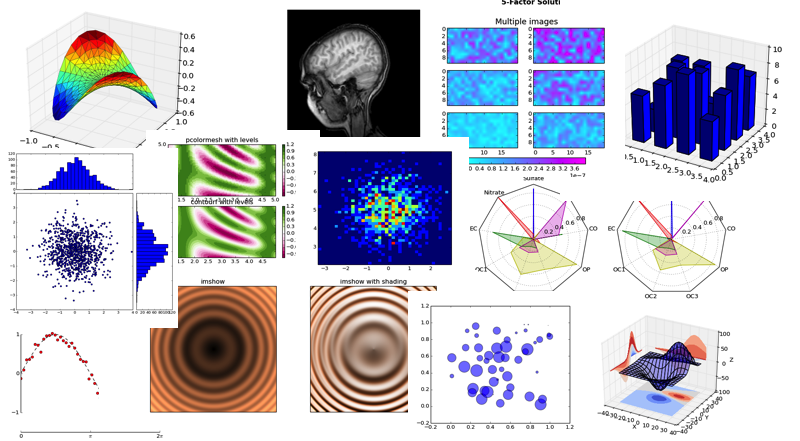

In [3]:
Image(filename="images/mpl.png", width=700, embed=True)

Basic 2D Plotting
-----------------
Before generating plots in Python we must load the main Matplotlib module. We did so in the beginning of this notebook.

### Drawing Lines
Plotting a simple function, such as a sine function, is easy to do.  All we need are two arrays, one for the x values, and one for the f(x) values

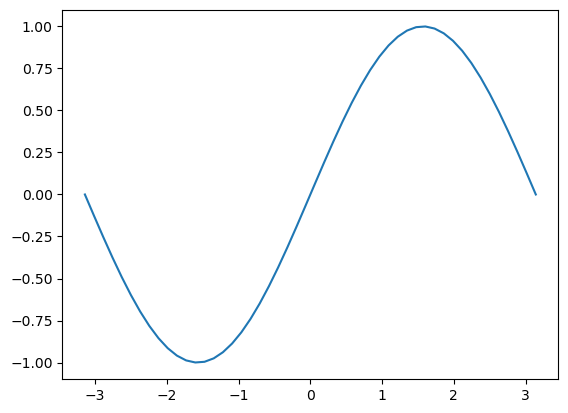

In [4]:
x = np.linspace(-np.pi, np.pi)
y = np.sin(x)
plt.plot(x, y)
plt.show()

Here, the plot command generates the figure, but it is not displayed until you run ```show()```.  If we want, we can also also add some labels to the axes and a title to the plot. While we are at it, lets change the color of the line to red, and make it a dashed line.

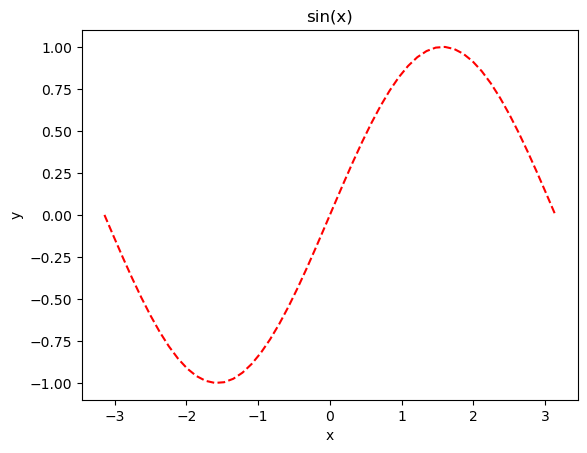

In [5]:
x = np.linspace(-np.pi, np.pi)
y = np.sin(x)
plt.plot(x, y, "r--")  # make line red 'r' and dashed '--'
plt.xlabel("x")
plt.ylabel("y")
plt.title("sin(x)")
plt.show()

Here the 'r' stands for red, but we could have used any of the built in colors:

- 'b': blue
- 'g': green
- 'r': red
- 'c': cyan
- 'm': magenta
- 'y': yellow
- 'k': black
- 'w': white

We can also specify the color of a line using the color keyword argument

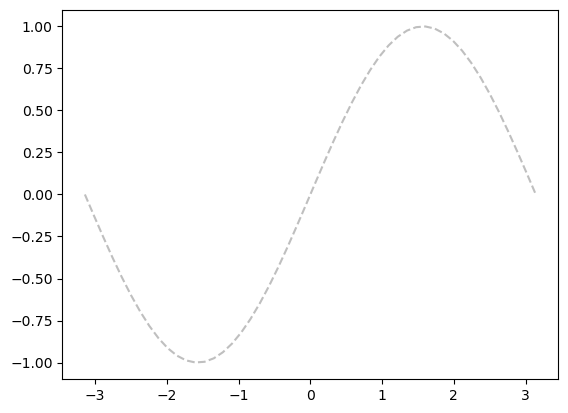

In [6]:
x = np.linspace(-np.pi, np.pi)
y = np.sin(x)
# Here a string from 0->1 specifies a gray value.
plt.plot(x, y, "--", color="0.75")
plt.show()

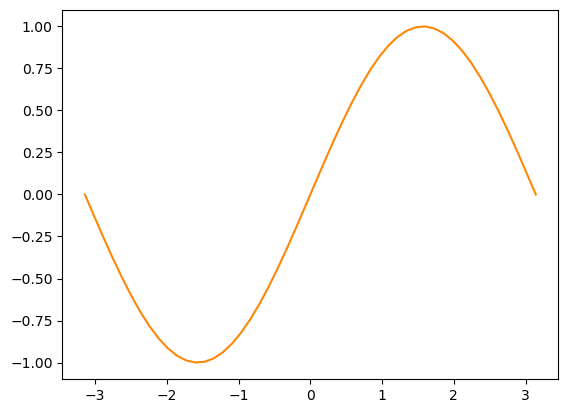

In [7]:
x = np.linspace(-np.pi, np.pi)
y = np.sin(x)
plt.plot(x, y, "-", color="#FD8808")  # We can also use hex colors if we want.
plt.show()

The style of the line can be changed from solid: ```''``` or ```'-'```, to dashed: ```'--'```, dotted ```'.'```, dash-dotted: ```'-.'```, dots+solid: ```'.-'```, or little dots: ```':'```.  One can also use the 'linstyle' or 'ls' keyword argument to change this style.  We can disply all of these variations using the **subplot** function that displays multiple plots in a grid specified by the number of rows, columns, and the number of the current plot.  We only need one ```show()``` command for viewing all of the plots.  To make the plot look good, we can also control the width and height of the figure by calling the ```figure``` function using the keyword argument 'figsize' that specifies the width and height of the figure in inches.

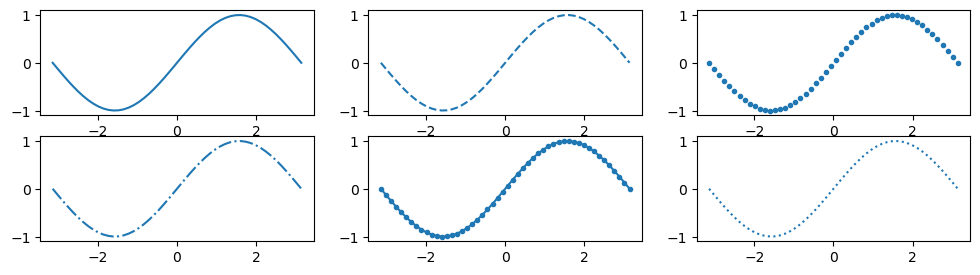

In [8]:
x = np.linspace(-np.pi, np.pi)
y = np.sin(x)
plt.figure(figsize=(12, 3))  # This controls the size of the figure
plt.subplot(2, 3, 1)  # This is the first plot in a 2x3 grid of plots
plt.plot(x, y)
plt.subplot(2, 3, 2)  # this is the second plot
plt.plot(x, y, linestyle="--")  # Demo using 'linestyle' keyword arguement
plt.subplot(2, 3, 3)
plt.plot(x, y, ".")
plt.subplot(2, 3, 4)
plt.plot(x, y, "-.")
plt.subplot(2, 3, 5)
plt.plot(x, y, ".-")
plt.subplot(2, 3, 6)
plt.plot(x, y, ls=":")  # Demo using 'ls' keyword arguement.
plt.show()

If we want to change the width of a line then we can use the 'linewidth' or 'lw' keyword arguements with a float number specifying the linewidth

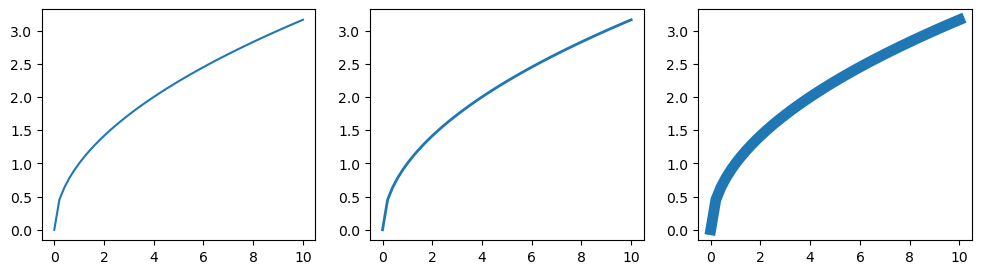

In [9]:
x = np.linspace(0, 10)
y = np.sqrt(x)
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(x, y)
plt.subplot(1, 3, 2)
plt.plot(x, y, linewidth=2)
plt.subplot(1, 3, 3)
plt.plot(x, y, lw=7.75)
plt.show()

If we want to plot multiple lines on a single plot, we can call the plot command several times, or we can use just a single plot command by entering the data for multiple lines simultaneously.

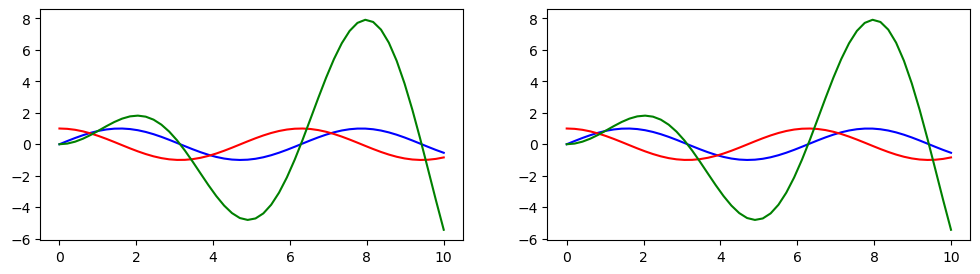

In [10]:
x = np.linspace(0, 10)
s = np.sin(x)
c = np.cos(x)
sx = x * np.sin(x)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
# call three different plot functions
plt.plot(x, s, "b")
plt.plot(x, c, "r")
plt.plot(x, sx, "g")

plt.subplot(1, 2, 2)
# combine multiple lines in one call to plot
plt.plot(x, s, "b", x, c, "r", x, sx, "g")
plt.show()

### Setting Axes Limits
Suppose we want to limit the range of either the x-axis or y-axis, or both.  In Matplotlib we can use the ```xlim``` and ```ylim``` functions to accomplish this.

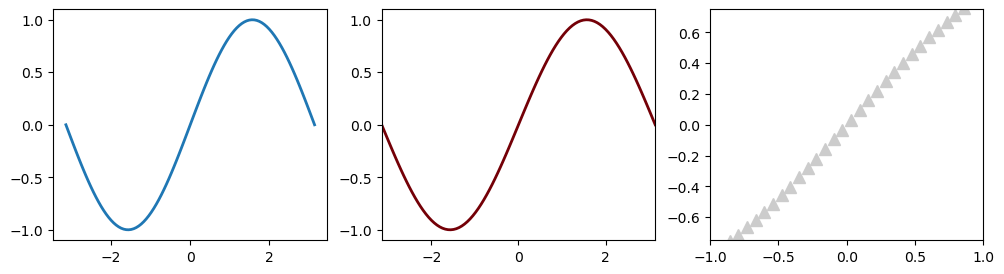

In [11]:
x = np.linspace(-np.pi, np.pi, 100)
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(x, np.sin(x), lw=2)
plt.subplot(1, 3, 2)
plt.plot(x, np.sin(x), lw=2, color="#740007")
plt.xlim([-np.pi, np.pi])  # change bounds on x-axis to [-pi,pi]
plt.subplot(1, 3, 3)
plt.plot(x, np.sin(x), "^", ms=8, color="0.8")
plt.xlim([-1, 1])  # change bounds on x-axis to [-1,1]
plt.ylim([-0.75, 0.75])  # change bounds on y-axis to [-0.75,0.75]
plt.show()

### Saving Figures
Now that we know how to make good looking plots, it would certainly be nice if we knew how to save these figures for use in a paper/report, or perhaps for posting on a webpage.  Fortunately, this is very easy to do.  If we want to save our previous figure then we need call the ```savefig``` function.

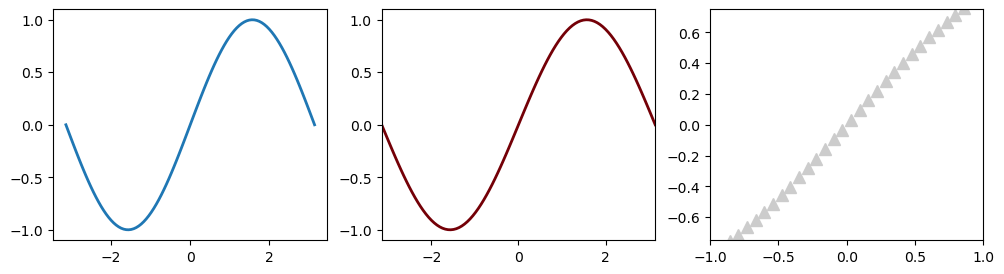

In [12]:
x = np.linspace(-np.pi, np.pi, 100)
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.plot(x, np.sin(x), lw=2)
plt.subplot(1, 3, 2)
plt.plot(x, np.sin(x), lw=2, color="#740007")
plt.xlim([-np.pi, np.pi])
plt.subplot(1, 3, 3)
plt.plot(x, np.sin(x), "^", ms=8, color="0.8")
plt.xlim([-1, 1])
plt.ylim([-0.75, 0.75])
plt.savefig(
    "axes_example.png"
)  # Save the figure in PNG format in same directory as script

The function```savefig``` saves the figure with the name and extension that is given in the string.  The name can be whatever you like, but the extension. ```.png``` in this case, must be a format that Matplotlib recognizes.  In this class we will only use the Portable Network Graphics ```.png``` and PDF ```.pdf``` formats.

### Using Shapes for Data Points
In addition to lines and dots, Matplotlib allows you to use many different shapes to represent the points on a graph.  In Matplotlib, these shapes are called **markers** and just like lines, their color and size can be controlled.  There are many [basic types of markers](http://matplotlib.org/api/markers_api.html), so here we will demonstrate just a few important ones: '*': star, 'o': circle, 's': square, and '+': plus by evaluating 
the Airy functions.

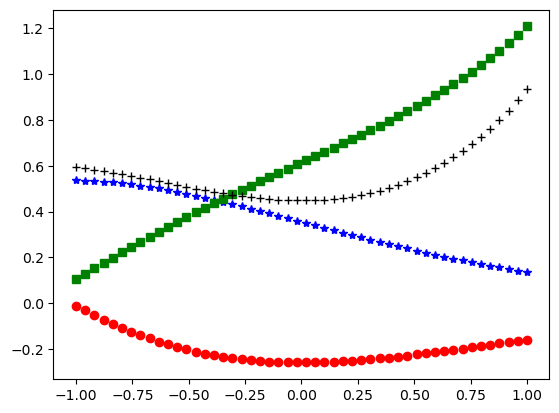

In [13]:
x = np.linspace(-1, 1)
Ai, Aip, Bi, Bip = airy(x)
plt.plot(x, Ai, "b*", x, Aip, "ro", x, Bi, "gs", x, Bip, "k+")
plt.show()

We can also chage the size of the shapes using the 'markersize' or 'ms' keyword arguments, and the color using 'markercolor' or 'mc'.

Other Kinds of 2D Plots
-----------------------
So far we have made use of only the ```plot``` function for generating 2D figures.  However, there are several other functions for generating different kinds of 2D plots. A collection of the many different types can be found at the [matplotlib gallery](http://matplotlib.org/gallery.html), and we will highlight only the more useful functions.

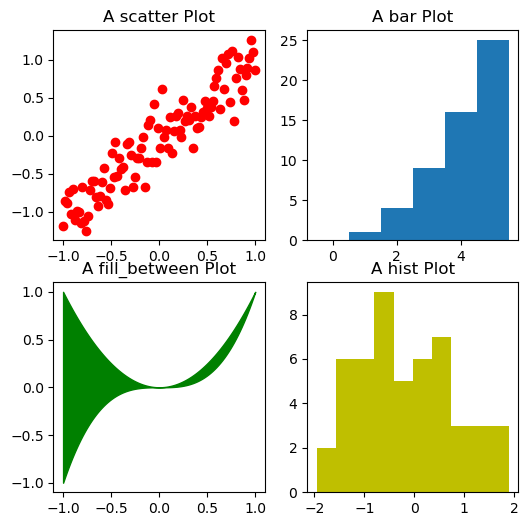

In [14]:
x = np.linspace(-1, 1.0, 100)
plt.figure(figsize=(6, 6))
plt.subplot(2, 2, 1)
y = x + 0.25 * np.random.randn(len(x))
plt.scatter(x, y, color="r")  # plot collection of (x,y) points
plt.title("A scatter Plot")
plt.subplot(2, 2, 2)
n = np.array([0, 1, 2, 3, 4, 5])
plt.bar(
    n, n**2, align="center", width=1
)  # aligns the bars over the x-numbers, and width=dx
plt.title("A bar Plot")
plt.subplot(2, 2, 3)
plt.fill_between(
    x, x**2, x**3, color="green"
)  # fill between x**2 & x**3 with green
plt.title("A fill_between Plot")
plt.subplot(2, 2, 4)
plt.title("A hist Plot")
r = np.random.randn(50)  # generating some random numbers
plt.hist(r, color="y")  # create a histogram of the random number values
plt.show()

The color and size of the elements can all be controlled in the same way as the usual ```plot``` function.

Additional Sources of Information
----------------------------------

- [MatplotLib Gallery](http://matplotlib.org/gallery.html) : A gallery of figures showing what Matplotlib can do.

- [Matplotlib Examples](http://matplotlib.org/examples/index.html) : A long list of examples demonstrating how to use Matplotlib for a variety of plotting.

- [Guide to 2D & 3D Plotting](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) : A guide for plotting in Matplotlib by Robert Johansson.

<h1 align="center">End of Tutorial</h1> 
<h3 align="center"><a href="http://qutip.org">Return to QuTiP Website</a></h3> 